<a href="https://colab.research.google.com/github/kjmobile/lb/blob/main/3_LM_Feature_engineering_and_regularization_Q.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Feature Engineering and Regularization

## Data Prep

In [8]:
import pandas as pd
import numpy as np
!pip install pymysql

In [9]:
# import data from mySQL database  using the following info host: kaylee-db.cbgcswckszgl.us-east-1.rds.amazonaws.com, id cob, password 1212, db='data', port 3306

import pymysql.cursors

# Connect to the database
connection = pymysql.connect(host='kaylee-db.cbgcswckszgl.us-east-1.rds.amazonaws.com',
                             user='',
                             password='',
                             db='data',
                             cursorclass=pymysql.cursors.DictCursor)

try:
    # Create a cursor object
    with connection.cursor() as cursor:
        # Execute the SQL query to fetch all data from the 'data' table
        cursor.execute("SELECT * FROM data.fish")

        # Fetch all the results
        results = cursor.fetchall()

        # Convert the results to a Pandas DataFrame
        fish_df = pd.DataFrame(results)

finally:
    # Close the connection
    connection.close()

# Print the DataFrame
print(fish_df)


    length  height  width  weight
0      8.4    2.11   1.41     5.9
1     13.7    3.53   2.00    32.0
2     15.0    3.82   2.43    40.0
3     16.2    4.59   2.63    51.5
4     17.4    4.59   2.94    70.0
5     18.0    5.22   3.32   100.0
6     18.7    5.20   3.12    78.0
7     19.0    5.64   3.05    80.0
8     19.6    5.14   3.04    85.0
9     20.0    5.08   2.77    85.0
10    21.0    5.69   3.56   110.0
11    21.0    5.92   3.31   115.0
12    21.0    5.69   3.67   125.0
13    21.3    6.38   3.53   130.0
14    22.0    6.11   3.41   120.0
15    22.0    5.64   3.52   120.0
16    22.0    6.11   3.52   130.0
17    22.0    5.88   3.52   135.0
18    22.0    5.52   4.00   110.0
19    22.5    5.86   3.62   130.0
20    22.5    6.79   3.62   150.0
21    22.7    5.95   3.63   145.0
22    23.0    5.22   3.63   150.0
23    23.5    6.28   3.72   170.0
24    24.0    7.29   3.72   225.0
25    24.0    6.38   3.82   145.0
26    24.6    6.73   4.17   188.0
27    25.0    6.44   3.68   180.0
28    25.6    

In [10]:
fish = fish_df.to_numpy()
print(fish)

[[   8.4     2.11    1.41    5.9 ]
 [  13.7     3.53    2.     32.  ]
 [  15.      3.82    2.43   40.  ]
 [  16.2     4.59    2.63   51.5 ]
 [  17.4     4.59    2.94   70.  ]
 [  18.      5.22    3.32  100.  ]
 [  18.7     5.2     3.12   78.  ]
 [  19.      5.64    3.05   80.  ]
 [  19.6     5.14    3.04   85.  ]
 [  20.      5.08    2.77   85.  ]
 [  21.      5.69    3.56  110.  ]
 [  21.      5.92    3.31  115.  ]
 [  21.      5.69    3.67  125.  ]
 [  21.3     6.38    3.53  130.  ]
 [  22.      6.11    3.41  120.  ]
 [  22.      5.64    3.52  120.  ]
 [  22.      6.11    3.52  130.  ]
 [  22.      5.88    3.52  135.  ]
 [  22.      5.52    4.    110.  ]
 [  22.5     5.86    3.62  130.  ]
 [  22.5     6.79    3.62  150.  ]
 [  22.7     5.95    3.63  145.  ]
 [  23.      5.22    3.63  150.  ]
 [  23.5     6.28    3.72  170.  ]
 [  24.      7.29    3.72  225.  ]
 [  24.      6.38    3.82  145.  ]
 [  24.6     6.73    4.17  188.  ]
 [  25.      6.44    3.68  180.  ]
 [  25.6     6.56   

In [11]:
from sklearn.model_selection import train_test_split

train_X, test_X, train_y, test_y = train_test_split(fish[:,:-1], fish[:,-1], random_state=42)

In [12]:
test_y.shape

(14,)

## Preprocessing - Feature engineering

In [13]:
from sklearn.preprocessing import PolynomialFeatures

In [14]:
poly = PolynomialFeatures(include_bias=False)

poly.fit(train_X)
train_poly = poly.transform(train_X)

In [15]:
print(train_poly.shape)

(42, 9)


In [16]:
train_poly[:2]

array([[ 19.6   ,   5.14  ,   3.04  , 384.16  , 100.744 ,  59.584 ,
         26.4196,  15.6256,   9.2416],
       [ 22.    ,   5.88  ,   3.52  , 484.    , 129.36  ,  77.44  ,
         34.5744,  20.6976,  12.3904]])

In [17]:
poly.get_feature_names_out()

array(['x0', 'x1', 'x2', 'x0^2', 'x0 x1', 'x0 x2', 'x1^2', 'x1 x2',
       'x2^2'], dtype=object)

In [18]:
#Now, transform the test set using the same poly class used for train set.
test_poly = poly.transform(test_X)


In [19]:
test_poly[:2]

array([[  8.4   ,   2.11  ,   1.41  ,  70.56  ,  17.724 ,  11.844 ,
          4.4521,   2.9751,   1.9881],
       [ 18.    ,   5.22  ,   3.32  , 324.    ,  93.96  ,  59.76  ,
         27.2484,  17.3304,  11.0224]])

In [20]:
np.set_printoptions(suppress=True)
test_poly

array([[   8.4   ,    2.11  ,    1.41  ,   70.56  ,   17.724 ,   11.844 ,
           4.4521,    2.9751,    1.9881],
       [  18.    ,    5.22  ,    3.32  ,  324.    ,   93.96  ,   59.76  ,
          27.2484,   17.3304,   11.0224],
       [  27.5   ,    7.28  ,    4.57  ,  756.25  ,  200.2   ,  125.675 ,
          52.9984,   33.2696,   20.8849],
       [  21.3   ,    6.38  ,    3.53  ,  453.69  ,  135.894 ,   75.189 ,
          40.7044,   22.5214,   12.4609],
       [  22.5   ,    5.86  ,    3.62  ,  506.25  ,  131.85  ,   81.45  ,
          34.3396,   21.2132,   13.1044],
       [  40.    ,   11.14  ,    6.63  , 1600.    ,  445.6   ,  265.2   ,
         124.0996,   73.8582,   43.9569],
       [  30.    ,    7.62  ,    4.77  ,  900.    ,  228.6   ,  143.1   ,
          58.0644,   36.3474,   22.7529],
       [  24.6   ,    6.73  ,    4.17  ,  605.16  ,  165.558 ,  102.582 ,
          45.2929,   28.0641,   17.3889],
       [  39.    ,   11.14  ,    7.49  , 1521.    ,  434.46  ,  292.11  

## Train Multple Regression

In [21]:
from sklearn.linear_model import LinearRegression

m0 = LinearRegression()
m0.fit(train_poly, train_y)
print(m0.score(train_poly, train_y))

0.9903183436982125


In [22]:
print(m0.score(test_poly, test_y))


0.9714559911594111


## But, what if we increase the degree from default 2 to 5 in PolynomialFeatures() method?

In [23]:
poly_5 = PolynomialFeatures(degree = 5, include_bias=False)

poly_5.fit(train_X)
train_poly_5 = poly_5.transform(train_X)
test_poly_5 = poly_5.transform(test_X)

In [24]:
train_y

array([  85.,  135.,   78.,   70.,  700.,  180.,  850.,  820., 1000.,
        120.,   85.,  130.,  225.,  260., 1100.,  900.,  145.,  115.,
        265., 1015.,  514.,  218.,  685.,   32.,  145.,   40.,  690.,
        840.,  300.,  170.,  650.,  110.,  150.,  110., 1000.,  150.,
         80.,  700.,  120.,  197., 1100.,  556.])

In [30]:
m1=LinearRegression()
m1.fit(train_poly_5, train_y)


LinearRegression()

In [31]:
print(m1.score(train_poly_5, train_y))
print(m1.score(test_poly_5, test_y))
# R-squared, -144.5 ? ; Something is wrong because the model seriously "overfitted" with train set.
# In this case, test_poly_5 set has only 14 records but have 55 (5 degree combination out of 3 variables) columns
# Here R^2 becomes negative; due to overfitting, the predictions differ significantly from the actual values.

0.9999999999996433
-144.40579436844948


In [32]:
test_poly_5[0,:].shape

(55,)


#### Here $R^2$ becomes negative because $SS_{res}$ > $SS_{tot}$ due to overfitting

$$ \large R^2 = 1 - \frac{SS_{\text{res}}}{SS_{\text{tot}}} $$








Overfitting occurs when the model fits with too much data.
This can be resolved by using regularization term to generalize the model.
Regularization can be done by adding a penalty to the weight parameters.
L1 and L2 regularizations are the two forms of regularizations.

A larger $\lambda$ increases the strength of the regularization.

$$\text {Lasso Regression- L1 Norm} : Min(Loss Function + \lambda||w||_1)$$  
$$\text {Ridge Regression- L2 Norm} : Min(Loss Function + \lambda||w||_2^2)$$

# Regularization

# Before applying regularization, standardization is necessary because regularization is scale sensitive

Standardization is a preprocessing technique used to scale the features of data so that they have a mean of 0 and a standard deviation of 1. It is represented as follows for each feature:


$$\large z=\frac{(x-\mu)}{\sigma}$$

    where:  z: standardized value,  x: original value,  μ: mean, σ: standard deviation.

Machine Learning Algorithms perform better when the data is standardized, it ensures that all features contribute equally to the analysis.

In [33]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
ss.fit(train_poly_5)

train_scaled = ss.transform(train_poly_5)
test_scaled = ss.transform(test_poly_5)

## Lasso : L1 regularization

In [34]:
from sklearn.linear_model import Lasso

lasso = Lasso()
lasso.fit(train_scaled, train_y)
print(lasso.score(train_scaled, train_y))

0.989789897208096


In [35]:
lasso?

In [36]:
print(lasso.score(test_scaled, test_y))

0.9800593698421883


## Hyperparameter Choice
   The $\lambda$ value is implimented as 'alpha' parameter in sklearn; default=1.0

In [37]:
import matplotlib.pyplot as plt


train_score_l = []
test_score_l = []

alpha_list = [0.001, 0.01, 0.1, 1, 10, 100]
for alpha in alpha_list:
    # lasso model
    lasso = Lasso(alpha=alpha)
    # train lasso model
    lasso.fit(train_scaled, train_y)
    # Save R-squares from train and test
    train_score_l.append(lasso.score(train_scaled, train_y))
    test_score_l.append(lasso.score(test_scaled, test_y))

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.336e+04, tolerance: 5.183e+02
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.025e+04, tolerance: 5.183e+02
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.062e+02, tolerance: 5.183e

In [39]:
test_score_l

[0.9836870822242811,
 0.9836730006301534,
 0.9819405116249363,
 0.9800593698421883,
 0.9824470598706695,
 0.9089071866576974]

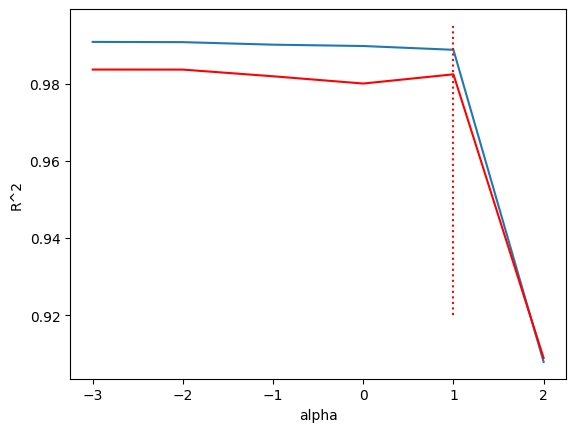

In [ ]:
plt.plot(np.log10(alpha_list), train_score_l)
plt.plot(np.log10(alpha_list), test_score_l, color='red')
plt.vlines(x=1, ymin=0.92, ymax=0.995, ls=':', color='red')
plt.xlabel('alpha')
plt.ylabel('R^2')
plt.show()

In [40]:
lasso = Lasso(alpha=10)
lasso.fit(train_scaled, train_y)

print(lasso.score(train_scaled, train_y))
print(lasso.score(test_scaled, test_y))

0.9888067471131867
0.9824470598706695


In [41]:
# 40 out of 55 coefficients are reduced to 0.
print(len(lasso.coef_))
print(np.sum(lasso.coef_==0))

# Although 55 features were fed into the model, the ridge model only used 15 of them.
# Due to this characteristic,the ridge (or lasso) model can also be used for feature selection purposes.

55
40


In [42]:
# Show the name of the coefficients that is greater than 0 in the lass model

lasso_coef = pd.Series(lasso.coef_, poly_5.get_feature_names_out())
lasso_coef[lasso_coef != 0]


x0^2        12.148525
x0 x1       55.448564
x0 x2       42.231008
x2^2        13.705962
x0^2 x1     43.218595
x0^2 x2      5.703378
x0 x1^2     47.462545
x0 x1 x2     7.423094
x0 x2^2     11.858234
x1 x2^2     13.530382
x2^3        21.221114
x0 x1^3     18.669930
x1^4        15.810418
x0 x1^4     18.146723
x1^5        15.512730
dtype: float64

## Ridge : L2 regularization

In [ ]:
from sklearn.linear_model import Ridge

ridge = Ridge()
ridge.fit(train_scaled, train_y)
print(ridge.score(train_scaled, train_y))

0.9896101671037343


In [ ]:
ridge?

In [ ]:
print(ridge.score(test_scaled, test_y))

0.9790693977615387


In [ ]:
train_score_r = []
test_score_r = []

In [ ]:
alpha_list = [0.001, 0.01, 0.1, 1, 10, 100]
# Increase the alpha value in increments of 10 times from 0.001 to 100
# while training the Ridge regression model.

for alpha in alpha_list:
    # ridge model
    ridge = Ridge(alpha=alpha)
    # train ridge model
    ridge.fit(train_scaled, train_y)
    # Save R squares
    train_score_r.append(ridge.score(train_scaled, train_y))
    test_score_r.append(ridge.score(test_scaled, test_y))

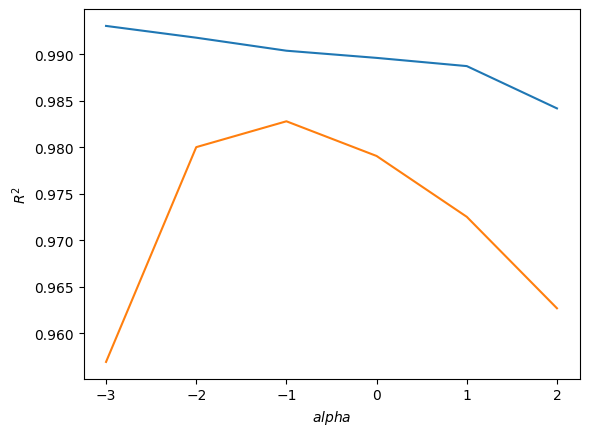

In [ ]:
plt.plot(np.log10(alpha_list), train_score_r)
plt.plot(np.log10(alpha_list), test_score_r)
#plt.vlines(x=-1, ymin=0.955, ymax=0.999, ls=':', color='r')
plt.xlabel('$alpha$')
plt.ylabel('$R^2$')
plt.show()

In [ ]:
ridge = Ridge()
ridge.fit(train_scaled, train_y)

print(ridge.score(train_scaled, train_y))
print(ridge.score(test_scaled, test_y))

0.9896101671037343
0.9790693977615387


In [ ]:
# fix the code in the cell above to optimize ridge regression by modifying hypterparameter alpha here.





